### The Perceptron

Implementation of Perceptron using Numpy

I referred to the [Deep Learning Playlist by Sebastian Raschka](https://www.youtube.com/playlist?list=PLTKMiZHVd_2KJtIXOW0zFhFfBaJJilH51) for understanding many of the concepts related to the perceptron and its implemetation. Anyone looking for great resources on deep learning can check it out!


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/perceptron_toydata.txt",delimiter='\t')

In [3]:
X,y=data.iloc[:,:2],data.iloc[:,2]

In [4]:
X

,0.77,-1.14
0,-0.33,1.44
1,0.91,-3.07
2,-0.37,-1.91
3,-1.84,-1.13
4,-1.50,0.34
...,...,...
94,0.71,2.27
95,1.96,0.83
96,2.52,1.83
97,2.77,2.82


In [5]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
94,1
95,1
96,1
97,1


## Shuffling the data

- Here we are **shuffling the data** so that the model doesnt learn any unintended patterns or biases from the dataset.

- So basically we first use ```np.arange(y.shape[0])``` which generates a numpy array containing numbers from 0 to y.shape[0] ( we couldve also done x.shape[0] and still gotten the same result)

- now that we have all the indices we will shuffle it using ```np.random.shuffle``` which just shuffle all the values inside the numpy array

- we have used random seeds to ensure reproducibility ie we get the same shuffling everytime.

In [6]:
random.seed(23)
np.random.seed(23)
shuffle_idx=np.arange(y.shape[0])
np.random.shuffle(shuffle_idx)

In [7]:
shuffle_idx

array([24, 53, 84,  3, 88, 50, 80, 72, 17,  9, 98, 97, 79, 86, 37, 29,  8,
       26,  4, 93,  5, 68, 28, 47,  7, 55, 11, 20, 74, 27, 23, 71, 18, 56,
       67, 16, 61, 82, 77, 46, 42, 34, 52, 87, 78,  0, 14, 30, 94, 38, 63,
       13, 32, 35, 44, 10,  2, 89, 95, 58, 60, 96, 70, 22, 81, 43,  1, 65,
       36, 15, 92, 59, 33, 19, 57, 62, 41, 48, 21, 85, 64, 69, 75, 66, 49,
       12, 45,  6, 51, 25, 90, 39, 91, 76, 31, 54, 73, 40, 83])

In [8]:
X,y=X.iloc[shuffle_idx].to_numpy(),y.iloc[shuffle_idx].to_numpy()

In [9]:
X_train,x_test=X[shuffle_idx[:70]],X[shuffle_idx[70:]]
y_train,y_test=y[shuffle_idx[:70]],y[shuffle_idx[70:]]

In [10]:
print(X_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(70, 2) (29, 2)
(70,) (29,)


In [11]:
mu,sigma=X_train.mean(axis=0),X_train.std(axis=0)

In [12]:
X_train=(X_train-mu)/sigma
x_test=(x_test-mu)/sigma

In [20]:
class Perceptron():
  def __init__(self,num_features):
    self.num_features=num_features
    self.weights=np.zeros((num_features,1),dtype=float)
    self.bias=np.zeros(1,dtype=float)

  def forward(self,X):
    z=np.dot(X,self.weights)+self.bias
    return np.where(z>0,1,0)

  def backward(self,X,y):
    y_hat=self.forward(X)
    err=(y-y_hat).reshape(-1)
    return err


  def train(self,X,y,epochs):
    for epoch in range(epochs):
      for i in range(X.shape[0]):
        err=self.backward(X[i].reshape(1,self.num_features),y[i])
        self.weights+=np.matmul(X[i].reshape(self.num_features,1),err.reshape(-1,1))
        self.bias+=err

  def evaluate(self,X,y):
    y_hat=self.forward(X).reshape(-1)
    accuracy=np.sum(y==y_hat)/y.shape[0]
    return accuracy


In [21]:
perceptron=Perceptron(2)
perceptron.train(X_train,y_train,5)
accuracy=perceptron.evaluate(x_test,y_test)


In [22]:
print(f"accuracy {accuracy*100}")

accuracy 89.65517241379311


In [23]:
weights=perceptron.weights
bias=perceptron.bias

In [24]:
weights,bias

(array([[1.45842958],
        [2.24265395]]),
 array([0.]))

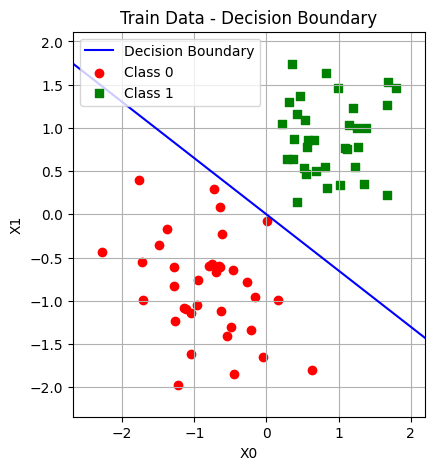

In [25]:


# w1*X1 + w0*X0 +b = 0 => Decision Boundary

X_train_min, X_train_max = X_train[:, 0].min(), X_train[:, 0].max()
X_train_y_min, X_train_y_max = X_train[:, 1].min(), X_train[:, 1].max()

X1_first_train = X_train_min
X0_first_train = -(bias + (X1_first_train * weights[1])) / weights[0]

X1_second_train = X_train_max
X0_second_train = -(bias + (X1_second_train * weights[1])) / weights[0]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot([X0_first_train, X0_second_train], [X1_first_train, X1_second_train], color='blue', label='Decision Boundary')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label='Class 0', marker='o', color='red')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label='Class 1', marker='s', color='green')

X_train_x_margin = (X_train_max - X_train_min) * 0.1
X_train_y_margin = (X_train_y_max - X_train_y_min) * 0.1

plt.xlim(X_train_min - X_train_x_margin, X_train_max + X_train_x_margin)
plt.ylim(X_train_y_min - X_train_y_margin, X_train_y_max + X_train_y_margin)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Train Data - Decision Boundary')
plt.legend()
plt.grid(True)

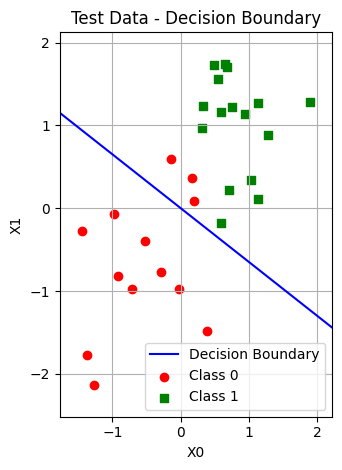

In [26]:
X_test_min, X_test_max = x_test[:, 0].min(), x_test[:, 0].max()
X_test_y_min, X_test_y_max = x_test[:, 1].min(), x_test[:, 1].max()

X1_first_test = X_test_min
X0_first_test = -(bias + (X1_first_test * weights[1])) / weights[0]

X1_second_test = X_test_max
X0_second_test = -(bias + (X1_second_test * weights[1])) / weights[0]

# Test plot
plt.subplot(1, 2, 2)
plt.plot([X0_first_test, X0_second_test], [X1_first_test, X1_second_test], color='blue', label='Decision Boundary')
plt.scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], label='Class 0', marker='o', color='red')
plt.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], label='Class 1', marker='s', color='green')

X_test_x_margin = (X_test_max - X_test_min) * 0.1
X_test_y_margin = (X_test_y_max - X_test_y_min) * 0.1

plt.xlim(X_test_min - X_test_x_margin, X_test_max + X_test_x_margin)
plt.ylim(X_test_y_min - X_test_y_margin, X_test_y_max + X_test_y_margin)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Test Data - Decision Boundary')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()